In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

In [ ]:
dataset=pd.read_excel("train data.xlsx")

In [ ]:
dataset.head()

,timestamp,location,city,weekday,pedestrians,weather_condition,date,hour,sunrise,sunset,...,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,rain
0,1653890400,Hauptstrass,Heidelberg,Monday,156,clear-day,2022-05-30,6,1653908890,1653959977,...,298.17,1009,71,292.19,0.00,0,10000,4.63,160,0.0
1,1653897600,Hauptstrass,Heidelberg,Monday,811,clear-day,2022-05-30,8,1653908890,1653959977,...,296.41,1008,80,292.35,0.00,0,10000,4.12,160,0.0
2,1654124400,Hauptstrass,Heidelberg,Wednesday,450,partly-cloudy-night,2022-06-01,23,1654081653,1654132849,...,308.18,1012,54,294.52,0.95,75,10000,1.79,127,0.0
3,1654128000,Hauptstrass,Heidelberg,Thursday,255,partly-cloudy-night,2022-06-02,0,1654081653,1654132849,...,305.64,1012,56,293.64,0.00,0,10000,1.54,130,0.0
4,1654156800,Hauptstrass,Heidelberg,Thursday,903,clear-day,2022-06-02,8,1654168037,1654219284,...,297.34,1012,85,294.04,0.00,20,10000,0.89,34,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x432 with 0 Axes>

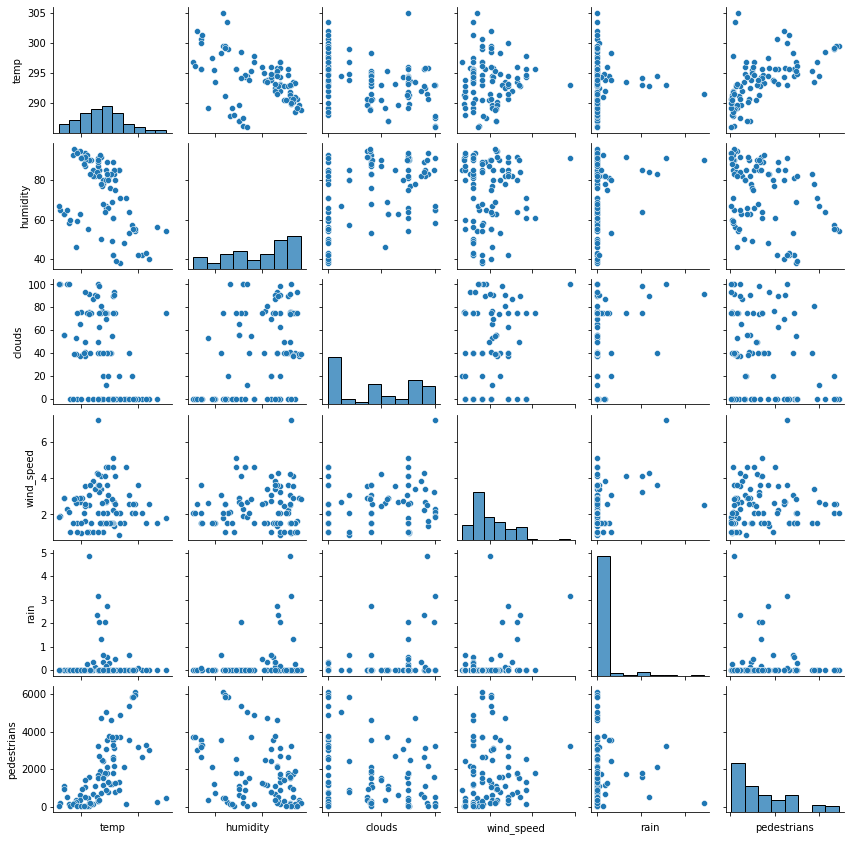

In [ ]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(dataset[['temp','humidity','clouds','wind_speed','rain','pedestrians']],size=2)
g.set(xticklabels=[])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


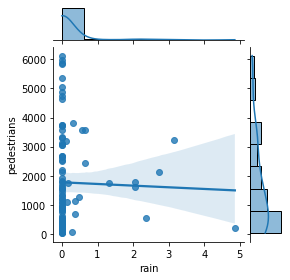

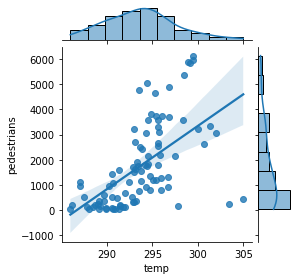

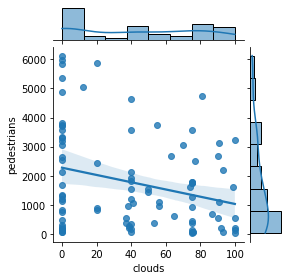

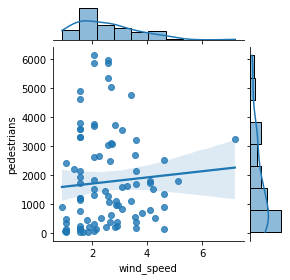

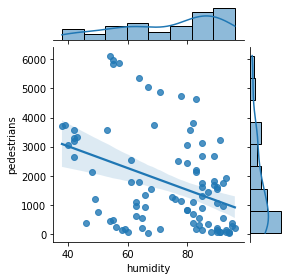

In [ ]:
sns.jointplot(x='rain',y='pedestrians',data=dataset,kind='reg',size=4)
sns.jointplot(x='temp',y='pedestrians',data=dataset,kind='reg',size=4)
sns.jointplot(x='clouds',y='pedestrians',data=dataset,kind='reg',size=4)
sns.jointplot(x='wind_speed',y='pedestrians',data=dataset,kind='reg',size=4)
sns.jointplot(x='humidity',y='pedestrians',data=dataset,kind='reg',size=4)

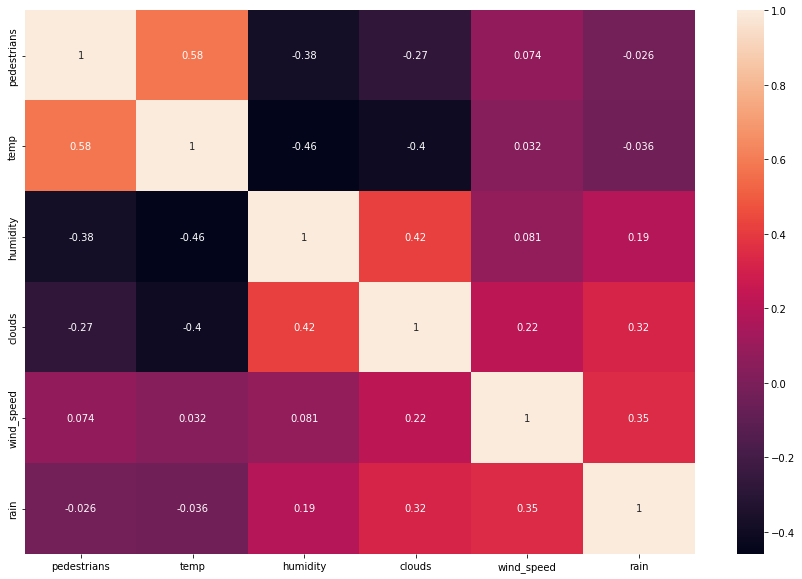

In [ ]:
plt.figure(figsize=(15,10))
columns =['pedestrians','temp','humidity','clouds','wind_speed','rain']
sns.heatmap(dataset[columns].corr(),annot=True)

In [ ]:
dataset.columns

Index(['timestamp', 'location', 'city', 'weekday', 'pedestrians',
       'weather_condition', 'date', 'hour', 'sunrise', 'sunset', 'temp',
       'feels_like', 'pressure', 'humidity', 'dew_point', 'uvi', 'clouds',
       'visibility', 'wind_speed', 'wind_deg', 'rain'],
      dtype='object')

In [ ]:
train_data=dataset.drop(['timestamp', 'location', 'city', 'weekday',
       'weather_condition', 'date', 'hour', 'sunrise', 'sunset',
       'feels_like', 'pressure', 'dew_point', 'uvi',
       'visibility', 'wind_deg'], axis=1)


In [ ]:
train_data.reset_index(drop=True, inplace=True)

In [ ]:
train_data.head()

,pedestrians,temp,humidity,clouds,wind_speed,rain
0,156,297.80,71,0,4.63,0.0
1,811,295.98,80,0,4.12,0.0
2,450,304.98,54,75,1.79,0.0
3,255,303.39,56,0,1.54,0.0
4,903,296.71,85,20,0.89,0.0


In [ ]:
X = train_data.iloc[:,1:].values
y = train_data.iloc[:,0].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [ ]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [ ]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  24
Decision tree  Regression Model Score is  29
Random Forest Regression Model Score is  59


,Model,Score,Explained Variance Score
2,Random forest Regression,0.592080,0.339456
1,Decision Tree,0.286952,0.346830
0,Multiple Linear Regression,0.239529,-1.278226


In [ ]:
from joblib import dump, load
dump(rf_regressor, 'rf_regressor.joblib') 

['rf_regressor.joblib']

In [ ]:
loaded_model.predict([X_test[0]])

array([2401.60714286])